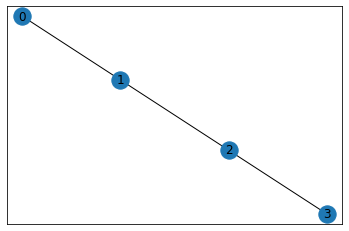

In [11]:
#undirected graph
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
plt.figure()
nx.draw_networkx(G)

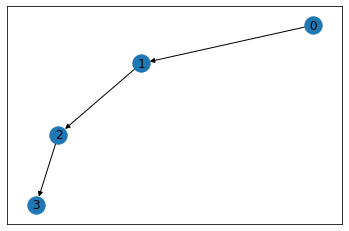

In [12]:
#directed graph
G = nx.DiGraph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
plt.figure()
nx.draw_networkx(G)

{(0, 1): Text(1.0, 1.5, '20'),
 (0, 2): Text(1.5, 2.5, '10'),
 (0, 4): Text(2.0, 2.5, '100'),
 (1, 2): Text(1.5, 3.0, '30')}

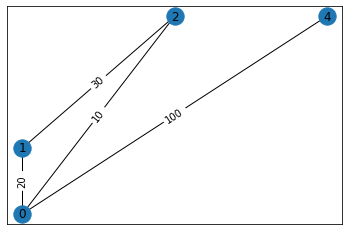

In [15]:
#weighted graph
G = nx.Graph()

G.add_node(0, pos=(1,1))
G.add_node(1, pos=(1,2))
G.add_node(2, pos=(2,4))
G.add_node(4, pos=(3,4))

G.add_edge(0,1,weight=20)
G.add_edge(1,2,weight=30)
G.add_edge(0,2,weight=10)
G.add_edge(0,4,weight=100)

weight = nx.get_edge_attributes(G,'weight')
pos = nx.get_node_attributes(G,'pos')

plt.figure()
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight)

{(0, 1): Text(1.0, 1.5, '20'),
 (0, 2): Text(1.5, 2.5, '10'),
 (0, 4): Text(2.0, 2.5, '100'),
 (1, 2): Text(1.5, 3.0, '30')}

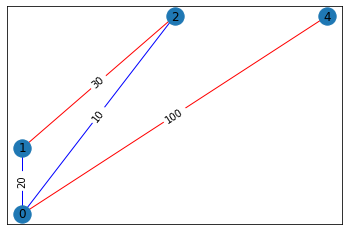

In [16]:
#relation graph
G = nx.Graph()

G.add_node(0, pos=(1,1))
G.add_node(1, pos=(1,2))
G.add_node(2, pos=(2,4))
G.add_node(4, pos=(3,4))

G.add_edge(0,1,weight=20,relation='friend')
G.add_edge(1,2,weight=30,relation='enemy')
G.add_edge(0,2,weight=10,relation='friend')
G.add_edge(0,4,weight=100,relation='enemy')

weight = nx.get_edge_attributes(G,'weight')
pos = nx.get_node_attributes(G,'pos')
relation = nx.get_edge_attributes(G,'relation')


plt.figure()
dic = {'enemy':'red','friend':'blue'}
nx.draw_networkx(G,pos,edge_color=[dic[x] for x in relation.values()])
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight)

In [ ]:
# dataset source - https://snap.stanford.edu/data/egonets-Facebook.html

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#facebook friendship network in text form ( edgelist format which means that start from one node to another node)

In [7]:
g = nx.read_edgelist(r'C:\Users\kayeth\facebook_combined.txt')

In [18]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
#but this may not be the reality one person can have more friends and other person can have less friends .

In [26]:
#this shows that the graph is connected or not .
nx.is_connected(g)

True

In [25]:
#this tells wheather the graph is directed or not .
nx.is_directed(g)

False

In [ ]:
#network centrality - identify the most important nodes in a network .# top 5 results

In [45]:
#degree centrality
degcent = nx.degree_centrality(g)
sorted(degcent.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[('107', 0.258791480931154),
 ('1684', 0.1961367013372957),
 ('1912', 0.18697374938088163),
 ('3437', 0.13546310054482416),
 ('0', 0.08593363051015354)]

In [44]:
#closeness centrality
closecent = nx.closeness_centrality(g)
sorted(closecent.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[('107', 0.45969945355191255),
 ('58', 0.3974018305284913),
 ('428', 0.3948371956585509),
 ('563', 0.3939127889961955),
 ('1684', 0.39360561458231796)]

In [38]:
#betweenness centrality
btwncent = nx.betweenness_centrality(g , normalized=True , endpoints = False)

In [39]:
import operator
sorted(btwncent.items(),key=operator.itemgetter(1),reverse=True)[0:5]
#this type of centrality takes much time than the others 

[('107', 0.4805180785560152),
 ('1684', 0.3377974497301992),
 ('3437', 0.23611535735892905),
 ('1912', 0.2292953395868782),
 ('1085', 0.14901509211665306)]

In [41]:
#betweenneess centrality approx
#close to acutal but not correct because now we are using only 10 nodes.
betwncent_approx = nx.betweenness_centrality(g , normalized = True ,endpoints = False , k = 10)

In [43]:
sorted(betwncent_approx.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[('107', 0.47663343974502154),
 ('3437', 0.3400613286805152),
 ('1684', 0.26263052027453426),
 ('1085', 0.20422229305031986),
 ('0', 0.17056112706618515)]

In [10]:
#betweenneess centrality edge
import operator
btwncent_edge = nx.edge_betweenness_centrality (g,normalized = True)
sorted(btwncent_edge.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[(('107', '1684'), 0.17149343710907303),
 (('107', '1085'), 0.1296753237809869),
 (('1085', '3437'), 0.09657963671547116),
 (('567', '3437'), 0.0921690287222111),
 (('0', '107'), 0.08835456037232164)]

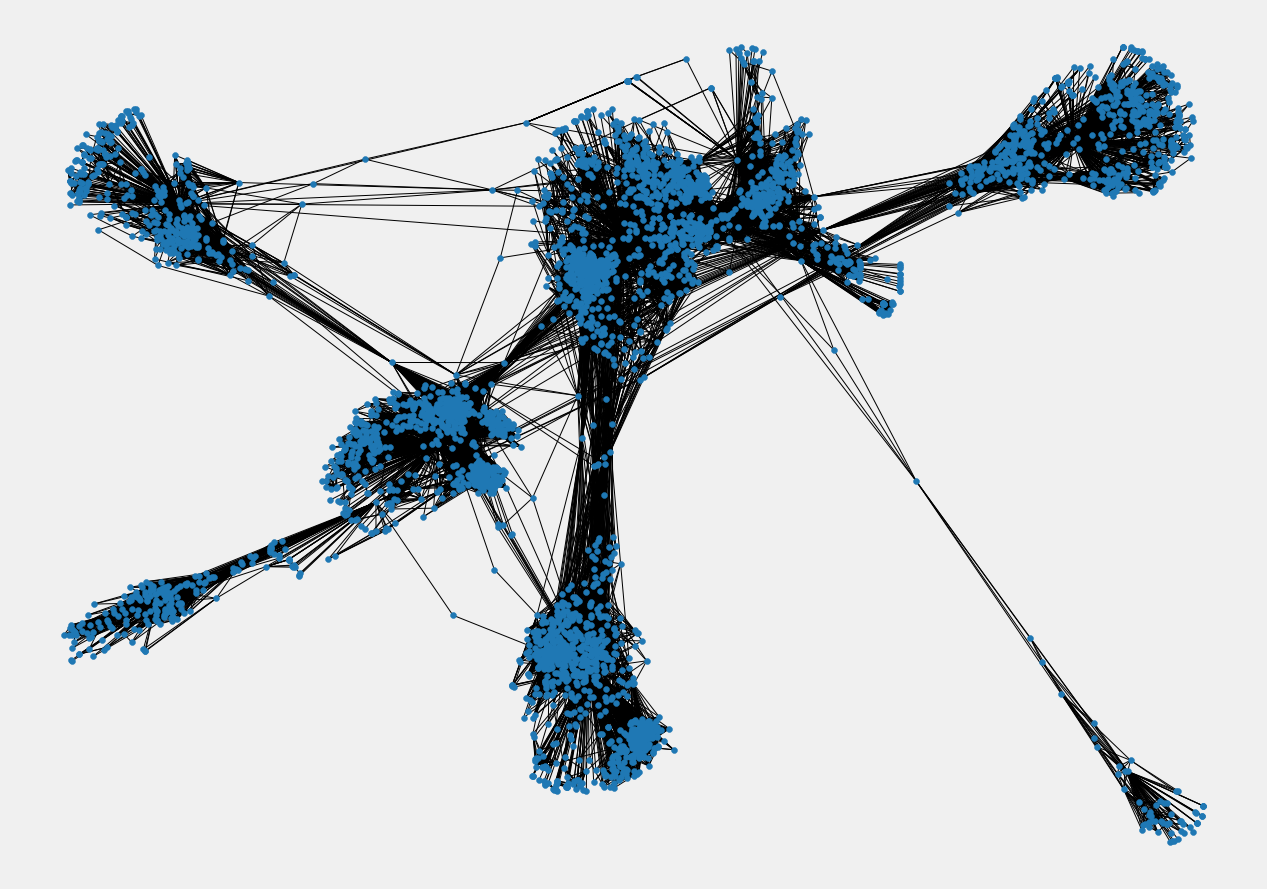

In [17]:
#this shows that the connection between nodes in facebook data . 
#the nodes are connected to almost everyone but they are clustered with few groups which are more densly connected.
pos = nx.spring_layout(g)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(g, pos, with_labels = False, node_size = 35)
plt.show()